# Chapter 10
## Section: Generating plots of Figure 10.1

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


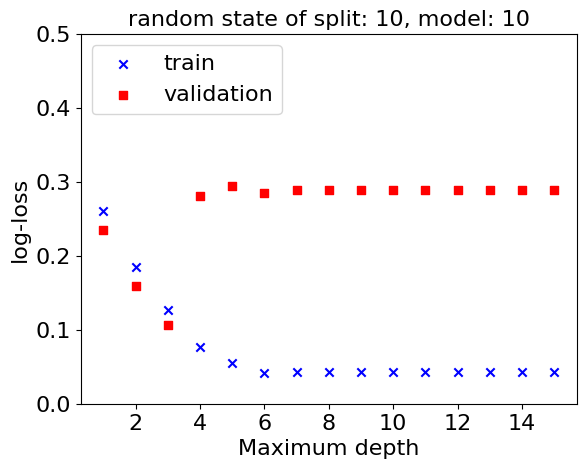

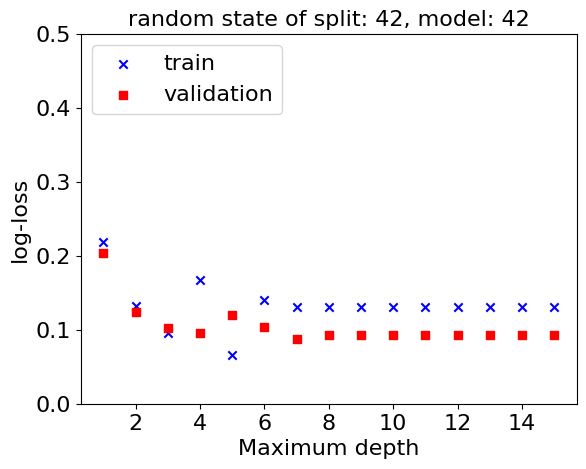

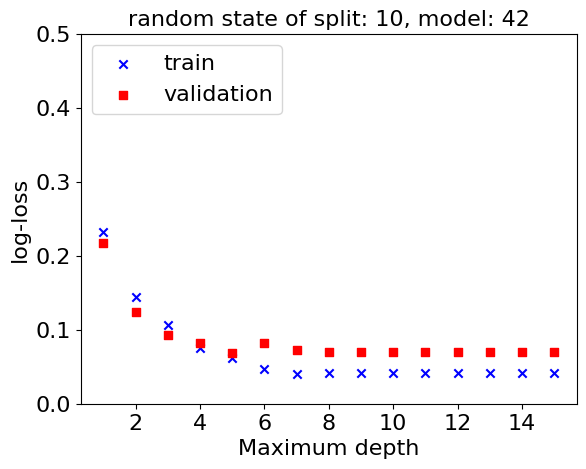

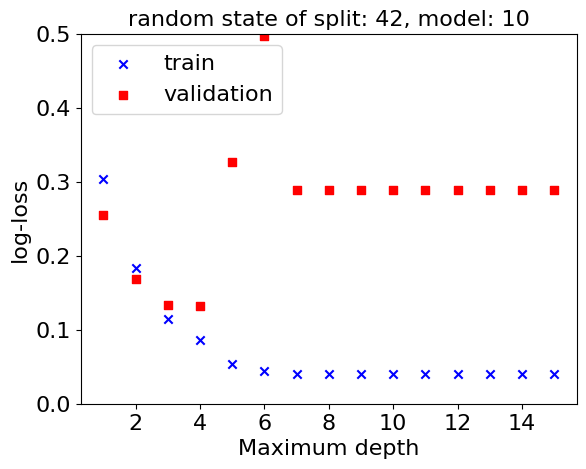

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score as bacc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def rf_breast_cancer(random_state_split: int, random_state_model: int):
  X, y = load_breast_cancer(return_X_y=True)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_state_split)

  maximum_depth = 15
  depth_range = range(1, maximum_depth+1)

  log_loss_train = []
  log_loss_test = []
  for depth_iter in depth_range:
    # initializing an fitting a decision tree model
    model_fit = RF(n_estimators = 5, max_depth = depth_iter, random_state=random_state_model).fit(X_train, y_train)
    # generating probability outputs of train and test set using the trained model
    train_y_probs = model_fit.predict_proba(X_train)
    test_y_probs = model_fit.predict_proba(X_test)
    # calculating log-loss
    log_loss_train.append(log_loss(y_train, train_y_probs))
    log_loss_test.append(log_loss(y_test, test_y_probs))

  return depth_range, log_loss_train, log_loss_test

from google.colab import drive
drive.mount('/content/gdrive')
def plot_bias_var(random_state_split: int, random_state_model: int):
  depth_range, log_loss_train, log_loss_test = rf_breast_cancer(
      random_state_split = random_state_split, random_state_model = random_state_model)
  plt.scatter(depth_range, log_loss_train, c='b', marker='x', label='train')
  plt.scatter(depth_range, log_loss_test, c='r', marker='s', label='validation')
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 16)
  plt.legend(loc='upper left', fontsize = 16)
  plt.ylabel('log-loss', fontsize = 16)
  plt.xlabel('Maximum depth', fontsize = 16)
  plt.title('random state of split: '+str(random_state_split)+
            ', model: '+str(random_state_model), fontsize = 16)
  plt.ylim(0, 0.5)

  plt.show()

plot_bias_var(random_state_split = 10, random_state_model = 10)
plot_bias_var(random_state_split = 42, random_state_model = 42)
plot_bias_var(random_state_split = 10, random_state_model = 42)
plot_bias_var(random_state_split = 42, random_state_model = 10)